<a href="https://colab.research.google.com/github/IsDaBaeS/DSI314-Project/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [61]:
!python --version
print(f'pasdas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

Python 3.8.16
pasdas  version: 1.3.5
numpy   version: 1.21.6
seaborn version: 0.11.2


In [62]:
# GDP
df_gdp = pd.read_csv('https://raw.githubusercontent.com/IsDaBaeS/DSI314-Project/main/gdp.csv')
df_gdp.head()

,GDP,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,20.293,20.17,20.616,20.057,18.02,18.883,18.401,18.876,20.136,no data
1,Albania,1.946,2.229,2.296,2.319,2.29,2.339,2.587,2.566,2.53,...,12.324,12.784,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.31
2,Algeria,42.346,44.372,44.78,47.529,51.513,61.132,61.535,63.3,51.664,...,209.059,209.755,213.81,165.979,160.034,170.207,175.372,171.68,144.922,162.711
3,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.189,3.193,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.33
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.05,9.818,...,128.053,136.71,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179


In [63]:
# การส่งออกทุเรียนไทยไปยังต่างประเทศปี 2017-2021
df_export = pd.read_csv('https://raw.githubusercontent.com/IsDaBaeS/DSI314-Project/main/export-fresh-durians-data/by-country_2017-2021.csv')
df_export.head()

,year,type,product,country,qty_per_year,value_per_year
0,2560,ทุเรียน,ทุเรียนสด,Afghanistan,0,0
1,2560,ทุเรียน,ทุเรียนสด,Australia,"46,288","10,434,837"
2,2560,ทุเรียน,ทุเรียนสด,Austria,16,"10,080"
3,2560,ทุเรียน,ทุเรียนสด,Bahrain,"7,187","871,835"
4,2560,ทุเรียน,ทุเรียนสด,Bangladesh,21,"2,310"


In [64]:
# การผลิตทุเรียนไทย
df_th = pd.read_csv('https://raw.githubusercontent.com/IsDaBaeS/DSI314-Project/main/thai_durian.csv')
df_th.columns = ['year', 'area', 'qty_th', 'qty/area', 'incountry']
df_th

,year,area,qty_th,qty/area,incountry
0,2559,"629,053","546,989",870,"115,264"
1,2560,"643,030","663,066","1,031","147,293"
2,2561,"675,343","759,829","1,125","229,379"
3,2562,"723,979","1,018,261","1,407","327,497"
4,2563,"791,165","1,111,928","1,405","435,505"
5,2564,"837,290","1,283,593","1,533","513,437"


In [65]:
df_export['qty_per_year'] = df_export['qty_per_year'].str.replace(',', '').astype('int')
df_export['value_per_year'] = df_export['value_per_year'].str.replace(',', '').astype('int')
df_export['country'] = df_export['country'].str.replace(' ', '')
df_export.head()

,year,type,product,country,qty_per_year,value_per_year
0,2560,ทุเรียน,ทุเรียนสด,Afghanistan,0,0
1,2560,ทุเรียน,ทุเรียนสด,Australia,46288,10434837
2,2560,ทุเรียน,ทุเรียนสด,Austria,16,10080
3,2560,ทุเรียน,ทุเรียนสด,Bahrain,7187,871835
4,2560,ทุเรียน,ทุเรียนสด,Bangladesh,21,2310


Top 10

In [118]:
#@title
df_find_top = df_export.copy()
mean_val_cty = df_find_top.groupby('country')['value_per_year'].apply(lambda x : x.astype(int).mean())
mean_val_cty.sort_values(ascending=False).head(5).map(int)

country
China           38588294121
Vietnam          8327863183
HongKong         6360945186
Taiwan            370666404
UnitedStates      172617986
Name: value_per_year, dtype: int64

In [67]:
df_top5 = df_export.loc[(df_export.country == 'China') | 
              (df_export.country == 'Vietnam') | 
              (df_export.country == 'HongKong') | 
              (df_export.country == 'Taiwan') | 
              (df_export.country == 'UnitedStates')]
df_top5.reset_index(drop=True, inplace=True)
df_top5

,year,type,product,country,qty_per_year,value_per_year
0,2560,ทุเรียน,ทุเรียนสด,China,135708133,7348142635
1,2560,ทุเรียน,ทุเรียนสด,HongKong,81570613,4172327235
2,2560,ทุเรียน,ทุเรียนสด,Taiwan,9146035,496881933
3,2560,ทุเรียน,ทุเรียนสด,UnitedStates,456539,81748024
4,2560,ทุเรียน,ทุเรียนสด,Vietnam,256869962,9718985158
5,2561,ทุเรียน,ทุเรียนสด,China,199985538,13179100980
6,2561,ทุเรียน,ทุเรียนสด,HongKong,86664989,5712097893
7,2561,ทุเรียน,ทุเรียนสด,Taiwan,7281335,404632662
8,2561,ทุเรียน,ทุเรียนสด,UnitedStates,623612,144785072
9,2561,ทุเรียน,ทุเรียนสด,Vietnam,182922949,9583828121


In [68]:
df_th = df_th[df_th.year >= 2560]
df_th

,year,area,qty_th,qty/area,incountry
1,2560,"643,030","663,066","1,031","147,293"
2,2561,"675,343","759,829","1,125","229,379"
3,2562,"723,979","1,018,261","1,407","327,497"
4,2563,"791,165","1,111,928","1,405","435,505"
5,2564,"837,290","1,283,593","1,533","513,437"


In [69]:
df_in_th = df_th.drop(columns=['area', 'qty/area', 'incountry'])
df_in_th['qty_th'] = df_in_th['qty_th'].str.replace(',', '').astype('int')*1000
df_in_th

,year,qty_th
1,2560,663066000
2,2561,759829000
3,2562,1018261000
4,2563,1111928000
5,2564,1283593000


In [70]:
df_gdp.rename(columns = {'GDP':'country'}, inplace = True)
# df_gdp.head()

In [71]:
df_gdp2 = df_gdp.copy()
df_gdp2 = df_gdp2.loc[(df_gdp2.country == "China, People's Republic of") | 
              (df_gdp2.country == 'Vietnam') | 
              (df_gdp2.country == 'Hong Kong SAR') | 
              (df_gdp2.country == 'Taiwan Province of China') | 
              (df_gdp2.country == 'United States')]
# df_gdp2

In [72]:
df_gdp3 = df_gdp2.copy()
df_gdp3['country'] = df_gdp3['country'].replace(["China, People's Republic of",'Hong Kong SAR', 'Taiwan Province of China', 'United States'], 
                                                    ['China', 'HongKong', 'Taiwan', 'UnitedStates'])
df_gdp3.reset_index(drop=True, inplace=True)
# df_gdp3

In [73]:
df_gdp4 = df_gdp3.copy()
df_gdp4 = df_gdp3[['country', '2017', '2018', '2019', '2020', '2021']]
df_gdp4.rename(columns = {'2017':'2560','2018':'2561', '2019':'2562', '2020':'2563', '2021':'2564'}, inplace = True)
df_gdp4

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,country,2560,2561,2562,2563,2564
0,China,12265.327,13841.812,14340.6,14862.564,17744.64
1,HongKong,341.271,361.731,363.052,344.923,369.158
2,Taiwan,590.733,609.198,611.396,669.25,774.728
3,UnitedStates,19479.625,20527.15,21372.6,20893.75,22996.075
4,Vietnam,277.071,303.091,327.873,342.941,366.201


In [74]:
df_gdp_top = pd.read_csv('https://raw.githubusercontent.com/IsDaBaeS/DSI314-Project/main/GDP5.csv')
df_gdp_top

,year,country,GDP
0,2560,China,12265.33
1,2560,HongKong,341.27
2,2560,Taiwan,590.73
3,2560,UnitedStates,19479.63
4,2560,Vietnam,277.07
5,2561,China,13841.81
6,2561,HongKong,361.73
7,2561,Taiwan,609.20
8,2561,UnitedStates,20527.15
9,2561,Vietnam,303.09


In [75]:
df_top5

,year,type,product,country,qty_per_year,value_per_year
0,2560,ทุเรียน,ทุเรียนสด,China,135708133,7348142635
1,2560,ทุเรียน,ทุเรียนสด,HongKong,81570613,4172327235
2,2560,ทุเรียน,ทุเรียนสด,Taiwan,9146035,496881933
3,2560,ทุเรียน,ทุเรียนสด,UnitedStates,456539,81748024
4,2560,ทุเรียน,ทุเรียนสด,Vietnam,256869962,9718985158
5,2561,ทุเรียน,ทุเรียนสด,China,199985538,13179100980
6,2561,ทุเรียน,ทุเรียนสด,HongKong,86664989,5712097893
7,2561,ทุเรียน,ทุเรียนสด,Taiwan,7281335,404632662
8,2561,ทุเรียน,ทุเรียนสด,UnitedStates,623612,144785072
9,2561,ทุเรียน,ทุเรียนสด,Vietnam,182922949,9583828121


In [76]:
df = pd.concat([df_top5, df_gdp_top['GDP']], axis = 1)
df

,year,type,product,country,qty_per_year,value_per_year,GDP
0,2560,ทุเรียน,ทุเรียนสด,China,135708133,7348142635,12265.33
1,2560,ทุเรียน,ทุเรียนสด,HongKong,81570613,4172327235,341.27
2,2560,ทุเรียน,ทุเรียนสด,Taiwan,9146035,496881933,590.73
3,2560,ทุเรียน,ทุเรียนสด,UnitedStates,456539,81748024,19479.63
4,2560,ทุเรียน,ทุเรียนสด,Vietnam,256869962,9718985158,277.07
5,2561,ทุเรียน,ทุเรียนสด,China,199985538,13179100980,13841.81
6,2561,ทุเรียน,ทุเรียนสด,HongKong,86664989,5712097893,361.73
7,2561,ทุเรียน,ทุเรียนสด,Taiwan,7281335,404632662,609.20
8,2561,ทุเรียน,ทุเรียนสด,UnitedStates,623612,144785072,20527.15
9,2561,ทุเรียน,ทุเรียนสด,Vietnam,182922949,9583828121,303.09


In [77]:
df_rate = pd.read_csv('https://raw.githubusercontent.com/IsDaBaeS/DSI314-Project/main/exchange%20_rate_usd.csv')
df_rate

,year,USD
0,2560,33.9385
1,2561,32.3104
2,2562,31.0470
3,2563,31.2955
4,2564,31.9807


In [78]:
df1 = df.copy()
df1 = df1.merge(df_rate, on = 'year', how = "inner")
df1

,year,type,product,country,qty_per_year,value_per_year,GDP,USD
0,2560,ทุเรียน,ทุเรียนสด,China,135708133,7348142635,12265.33,33.9385
1,2560,ทุเรียน,ทุเรียนสด,HongKong,81570613,4172327235,341.27,33.9385
2,2560,ทุเรียน,ทุเรียนสด,Taiwan,9146035,496881933,590.73,33.9385
3,2560,ทุเรียน,ทุเรียนสด,UnitedStates,456539,81748024,19479.63,33.9385
4,2560,ทุเรียน,ทุเรียนสด,Vietnam,256869962,9718985158,277.07,33.9385
5,2561,ทุเรียน,ทุเรียนสด,China,199985538,13179100980,13841.81,32.3104
6,2561,ทุเรียน,ทุเรียนสด,HongKong,86664989,5712097893,361.73,32.3104
7,2561,ทุเรียน,ทุเรียนสด,Taiwan,7281335,404632662,609.20,32.3104
8,2561,ทุเรียน,ทุเรียนสด,UnitedStates,623612,144785072,20527.15,32.3104
9,2561,ทุเรียน,ทุเรียนสด,Vietnam,182922949,9583828121,303.09,32.3104


In [79]:
df2 = df1.copy()
df2['value_per_year_usd'] = (df2['value_per_year']/df2['USD']).astype('int')
df2

,year,type,product,country,qty_per_year,value_per_year,GDP,USD,value_per_year_usd
0,2560,ทุเรียน,ทุเรียนสด,China,135708133,7348142635,12265.33,33.9385,216513476
1,2560,ทุเรียน,ทุเรียนสด,HongKong,81570613,4172327235,341.27,33.9385,122937879
2,2560,ทุเรียน,ทุเรียนสด,Taiwan,9146035,496881933,590.73,33.9385,14640656
3,2560,ทุเรียน,ทุเรียนสด,UnitedStates,456539,81748024,19479.63,33.9385,2408710
4,2560,ทุเรียน,ทุเรียนสด,Vietnam,256869962,9718985158,277.07,33.9385,286370498
5,2561,ทุเรียน,ทุเรียนสด,China,199985538,13179100980,13841.81,32.3104,407890369
6,2561,ทุเรียน,ทุเรียนสด,HongKong,86664989,5712097893,361.73,32.3104,176788213
7,2561,ทุเรียน,ทุเรียนสด,Taiwan,7281335,404632662,609.20,32.3104,12523294
8,2561,ทุเรียน,ทุเรียนสด,UnitedStates,623612,144785072,20527.15,32.3104,4481067
9,2561,ทุเรียน,ทุเรียนสด,Vietnam,182922949,9583828121,303.09,32.3104,296617439


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                25 non-null     int64  
 1   type                25 non-null     object 
 2   product             25 non-null     object 
 3   country             25 non-null     object 
 4   qty_per_year        25 non-null     int64  
 5   value_per_year      25 non-null     int64  
 6   GDP                 25 non-null     float64
 7   USD                 25 non-null     float64
 8   value_per_year_usd  25 non-null     int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 2.0+ KB


In [81]:
df3 = df2.copy()
df3 = df3.merge(df_in_th, on = 'year', how = "inner")
df3

,year,type,product,country,qty_per_year,value_per_year,GDP,USD,value_per_year_usd,qty_th
0,2560,ทุเรียน,ทุเรียนสด,China,135708133,7348142635,12265.33,33.9385,216513476,663066000
1,2560,ทุเรียน,ทุเรียนสด,HongKong,81570613,4172327235,341.27,33.9385,122937879,663066000
2,2560,ทุเรียน,ทุเรียนสด,Taiwan,9146035,496881933,590.73,33.9385,14640656,663066000
3,2560,ทุเรียน,ทุเรียนสด,UnitedStates,456539,81748024,19479.63,33.9385,2408710,663066000
4,2560,ทุเรียน,ทุเรียนสด,Vietnam,256869962,9718985158,277.07,33.9385,286370498,663066000
5,2561,ทุเรียน,ทุเรียนสด,China,199985538,13179100980,13841.81,32.3104,407890369,759829000
6,2561,ทุเรียน,ทุเรียนสด,HongKong,86664989,5712097893,361.73,32.3104,176788213,759829000
7,2561,ทุเรียน,ทุเรียนสด,Taiwan,7281335,404632662,609.20,32.3104,12523294,759829000
8,2561,ทุเรียน,ทุเรียนสด,UnitedStates,623612,144785072,20527.15,32.3104,4481067,759829000
9,2561,ทุเรียน,ทุเรียนสด,Vietnam,182922949,9583828121,303.09,32.3104,296617439,759829000


In [82]:
data = df3.drop(['type', 'product', 'value_per_year', 'USD'], axis=1)
data

,year,country,qty_per_year,GDP,value_per_year_usd,qty_th
0,2560,China,135708133,12265.33,216513476,663066000
1,2560,HongKong,81570613,341.27,122937879,663066000
2,2560,Taiwan,9146035,590.73,14640656,663066000
3,2560,UnitedStates,456539,19479.63,2408710,663066000
4,2560,Vietnam,256869962,277.07,286370498,663066000
5,2561,China,199985538,13841.81,407890369,759829000
6,2561,HongKong,86664989,361.73,176788213,759829000
7,2561,Taiwan,7281335,609.20,12523294,759829000
8,2561,UnitedStates,623612,20527.15,4481067,759829000
9,2561,Vietnam,182922949,303.09,296617439,759829000


# Model

In [83]:
#@title Quantity per year Thailand 2565-2569
model = LinearRegression()
X_qty_th = df_in_th[['year']]
y_qty_th = df_in_th.qty_th

model.fit(X_qty_th.values, y_qty_th)
print('qty th score :',model.score(X_qty_th.values, y_qty_th))

pred_qty_th = model.predict(np.arange(2565, 2570, 1).reshape(-1, 1))
print('Predict qty th :',pred_qty_th)

qty th score : 0.9793777143952332
Predict qty th : [1.4452813e+09 1.6045966e+09 1.7639119e+09 1.9232272e+09 2.0825425e+09]


## Top 1 - China

In [84]:
#@title
data1 = data.copy()
top1 = data1.groupby('country')
top_1 = top1.get_group('China')
top_1

,year,country,qty_per_year,GDP,value_per_year_usd,qty_th
0,2560,China,135708133,12265.33,216513476,663066000
5,2561,China,199985538,13841.81,407890369,759829000
10,2562,China,375202225,14340.60,848147726,1018261000
15,2563,China,444215457,14862.56,1526684309,1111928000
20,2564,China,779872198,17744.64,3073836273,1283593000


In [85]:
# top_1.info()

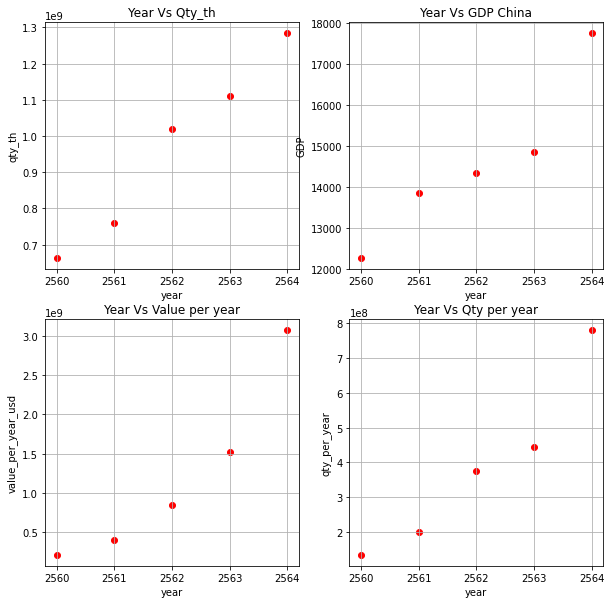

In [86]:
#@title
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(top_1['year'], top_1['qty_th'], color='red')
plt.title('Year Vs Qty_th')
plt.xlabel('year')
plt.ylabel('qty_th')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(top_1['year'], top_1['GDP'], color='red')
plt.title('Year Vs GDP China')
plt.xlabel('year')
plt.ylabel('GDP')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(top_1['year'], top_1['value_per_year_usd'], color='red')
plt.title('Year Vs Value per year')
plt.xlabel('year')
plt.ylabel('value_per_year_usd')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(top_1['year'], top_1['qty_per_year'], color='red')
plt.title('Year Vs Qty per year')
plt.xlabel('year')
plt.ylabel('qty_per_year')
plt.grid(True)
plt.show()

In [87]:
#@title
model = LinearRegression()
X_gdp1 = top_1[['year']]
y_gdp1 = top_1.GDP

model.fit(X_gdp1.values, y_gdp1)
print('GDP China score :', model.score(X_gdp1.values, y_gdp1))

pred_gdp1 = model.predict(np.arange(2565, 2570, 1).reshape(-1, 1))
print('Predict GDP China:', pred_gdp1)

GDP China score : 0.8941185521505184
Predict GDP China: [18204.799 19402.736 20600.673 21798.61  22996.547]


In [88]:
#@title
regr = LinearRegression()

# value per year China
X_val_1 = top_1[['GDP', 'qty_th']]
y_val_1 = top_1['value_per_year_usd']

val_top1 = regr.fit(X_val_1.values, y_val_1)

print('Intercept (value China) :', val_top1.intercept_)
print('Coefficients (value China) :', val_top1.coef_)
print('Model score (value China) :',regr.score(X_val_1.values, y_val_1))

pred_val_top1 = val_top1.predict([[pred_gdp1[0], pred_qty_th[0]],
                          [pred_gdp1[1], pred_qty_th[1]],
                          [pred_gdp1[2], pred_qty_th[2]],
                          [pred_gdp1[3], pred_qty_th[3]],
                          [pred_gdp1[4], pred_qty_th[4]]])
print('Predict value China :', pred_val_top1)
print('\n')

# qty per year China
X_qty_1 = top_1[['GDP', 'qty_th']]
y_qty_1 = top_1['qty_per_year']

qty_top1 = regr.fit(X_qty_1.values, y_qty_1)

print('Intercept (qty China) :', qty_top1.intercept_)
print('Coefficients (qty China) :', qty_top1.coef_)
print('Model score (qty China) :',regr.score(X_qty_1.values, y_qty_1))

pred_qty_top1 = qty_top1.predict([[pred_gdp1[0], pred_qty_th[0]],
                          [pred_gdp1[1], pred_qty_th[1]],
                          [pred_gdp1[2], pred_qty_th[2]],
                          [pred_gdp1[3], pred_qty_th[3]],
                          [pred_gdp1[4], pred_qty_th[4]]])

print('Predict qty China :', pred_qty_top1)

Intercept (value China) : -6313729438.752216
Coefficients (value China) : [4.59378647e+05 8.43934767e-01]
Model score (value China) : 0.9436356770180896
Predict value China : [3.26888963e+09 3.95364802e+09 4.63840642e+09 5.32316482e+09
 6.00792322e+09]


Intercept (qty China) : -1132354752.2901912
Coefficients (qty China) : [7.88479122e+04 3.79708593e-01]
Model score (qty China) : 0.9775392976669112
Predict qty China : [8.51841370e+08 1.00678959e+09 1.16173781e+09 1.31668603e+09
 1.47163425e+09]


## Top 2 - Vietnam

In [89]:
#@title
data1 = data.copy()
top2 = data1.groupby('country')
top_2 = top2.get_group('Vietnam')
top_2

,year,country,qty_per_year,GDP,value_per_year_usd,qty_th
4,2560,Vietnam,256869962,277.07,286370498,663066000
9,2561,Vietnam,182922949,303.09,296617439,759829000
14,2562,Vietnam,164380502,327.87,357206587,1018261000
19,2563,Vietnam,78151834,342.94,241565110,1111928000
24,2564,Vietnam,36227329,366.20,115269797,1283593000


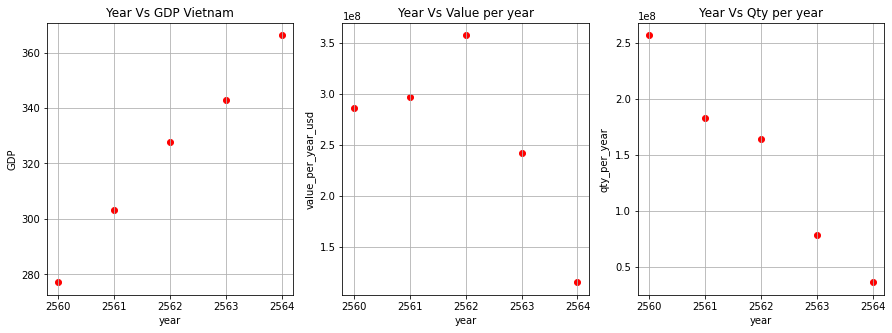

In [90]:
#@title
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(top_2['year'], top_2['GDP'], color='red')
plt.title('Year Vs GDP Vietnam')
plt.xlabel('year')
plt.ylabel('GDP')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(top_2['year'], top_2['value_per_year_usd'], color='red')
plt.title('Year Vs Value per year')
plt.xlabel('year')
plt.ylabel('value_per_year_usd')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(top_2['year'], top_2['qty_per_year'], color='red')
plt.title('Year Vs Qty per year')
plt.xlabel('year')
plt.ylabel('qty_per_year')
plt.grid(True)
plt.show()

In [91]:
#@title
model = LinearRegression()
X_gdp2 = top_2[['year']]
y_gdp2 = top_2.GDP

model.fit(X_gdp2.values, y_gdp2)
print('GDP Vietnam score :',model.score(X_gdp2.values, y_gdp2))

pred_gdp2 = model.predict(np.arange(2565, 2570, 1).reshape(-1, 1))
print('Predict GDP Vietnam:',pred_gdp2)

GDP Vietnam score : 0.9926147454096051
Predict GDP Vietnam: [388.867 410.678 432.489 454.3   476.111]


In [92]:
#@title
regr = LinearRegression()

# value per year Vietnam
X_val_2 = top_2[['GDP', 'qty_th']]
y_val_2 = top_2['value_per_year_usd']
 
val_top2 = regr.fit(X_val_2.values, y_val_2)

print('Intercept (value Vietnam) :', val_top2.intercept_)
print('Coefficients (value Vietnam) :', val_top2.coef_)
print('Model score (value Vietnam) :',regr.score(X_val_2.values, y_val_2))

pred_val_top2 = val_top2.predict([[pred_gdp2[0], pred_qty_th[0]],
                          [pred_gdp2[1], pred_qty_th[1]],
                          [pred_gdp2[2], pred_qty_th[2]],
                          [pred_gdp2[3], pred_qty_th[3]],
                          [pred_gdp2[4], pred_qty_th[4]]])
print('Predict value Vietnam :', pred_val_top2)
print('\n')

# qty per year Vietnam
X_qty_2 = top_2[['GDP', 'qty_th']]
y_qty_2 = top_2['qty_per_year']

qty_top2 = regr.fit(X_qty_2.values, y_qty_2)

print('Intercept (qty Vietnam) :', qty_top2.intercept_)
print('Coefficients (qty Vietnam) :', qty_top2.coef_)
print('Model score (qty Vietnam) :',regr.score(X_qty_2.values, y_qty_2))

pred_qty_top2 = qty_top2.predict([[pred_gdp2[0], pred_qty_th[0]],
                          [pred_gdp2[1], pred_qty_th[1]],
                          [pred_gdp2[2], pred_qty_th[2]],
                          [pred_gdp2[3], pred_qty_th[3]],
                          [pred_gdp2[4], pred_qty_th[4]]])

print('Predict qty Vietnam :', pred_qty_top2)

Intercept (value Vietnam) : 741369870.5092006
Coefficients (value Vietnam) : [-1.35288943e+06 -4.58926067e-02]
Model score (value Vietnam) : 0.4165809714719513
Predict value Vietnam : [1.48948089e+08 1.12128823e+08 7.53095569e+07 3.84902911e+07
 1.67102523e+06]


Intercept (qty Vietnam) : 1259108279.968344
Coefficients (qty Vietnam) : [-4.13207392e+06  2.28519944e-01]
Model score (qty Vietnam) : 0.9618692706422516
Predict qty Vietnam : [-1.74433072e+07 -7.11612481e+07 -1.24879189e+08 -1.78597130e+08
 -2.32315071e+08]


In [93]:
pred_qty_top2.min()

-232315070.51339936

In [94]:
pred_qty_top2_nor = pred_qty_top2 + abs(pred_qty_top2.min())
print('Predict qty Vietnam :', pred_qty_top2)
print('Predict qty Vietnam normalize:', pred_qty_top2_nor)

Predict qty Vietnam : [-1.74433072e+07 -7.11612481e+07 -1.24879189e+08 -1.78597130e+08
 -2.32315071e+08]
Predict qty Vietnam normalize: [2.14871763e+08 1.61153822e+08 1.07435882e+08 5.37179408e+07
 0.00000000e+00]


## Top 3 - Hongkong

In [95]:
#@title
data1 = data.copy()
top3 = data1.groupby('country')
top_3 = top3.get_group('HongKong')
top_3

,year,country,qty_per_year,GDP,value_per_year_usd,qty_th
1,2560,HongKong,81570613,341.27,122937879,663066000
6,2561,HongKong,86664989,361.73,176788213,759829000
11,2562,HongKong,99932874,363.05,225163684,1018261000
16,2563,HongKong,83561984,344.92,284456939,1111928000
21,2564,HongKong,47643849,369.16,188470600,1283593000


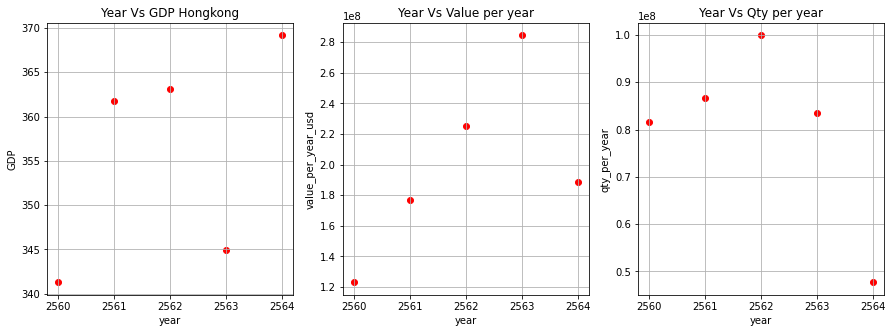

In [96]:
#@title
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(top_3['year'], top_3['GDP'], color='red')
plt.title('Year Vs GDP Hongkong')
plt.xlabel('year')
plt.ylabel('GDP')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(top_3['year'], top_3['value_per_year_usd'], color='red')
plt.title('Year Vs Value per year')
plt.xlabel('year')
plt.ylabel('value_per_year_usd')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(top_3['year'], top_3['qty_per_year'], color='red')
plt.title('Year Vs Qty per year')
plt.xlabel('year')
plt.ylabel('qty_per_year')
plt.grid(True)
plt.show()

In [97]:
#@title
model = LinearRegression()
X_gdp3 = top_3[['year']]
y_gdp3 = top_3.GDP

model.fit(X_gdp3.values, y_gdp3)
print('GDP Hongkong score :',model.score(X_gdp3.values, y_gdp3))

pred_gdp3 = model.predict(np.arange(2565, 2570, 1).reshape(-1, 1))
print('Predict GDP Hongkong:',pred_gdp3)

GDP Hongkong score : 0.255041271499557
Predict GDP Hongkong: [367.717 371.614 375.511 379.408 383.305]


In [98]:
#@title
regr = LinearRegression()

# value per year Hongkong

X_val_3 = top_3[['GDP', 'qty_th']]
y_val_3 = top_3['value_per_year_usd']
 

val_top3 = regr.fit(X_val_3.values, y_val_3)

print('Intercept (value Hongkong) :', val_top3.intercept_)
print('Coefficients (value Hongkong) :', val_top3.coef_)
print('Model score (value Hongkong) :',regr.score(X_val_3.values, y_val_3))

pred_val_top3 = val_top3.predict([[pred_gdp3[0], pred_qty_th[0]],
                          [pred_gdp3[1], pred_qty_th[1]],
                          [pred_gdp3[2], pred_qty_th[2]],
                          [pred_gdp3[3], pred_qty_th[3]],
                          [pred_gdp3[4], pred_qty_th[4]]])
print('Predict value Hongkong :', pred_val_top3)
print('\n')

# qty per year Hongkong
X_qty_3 = top_3[['GDP', 'qty_th']]
y_qty_3 = top_3['qty_per_year']

qty_top3 = regr.fit(X_qty_3.values, y_qty_3)

print('Intercept (qty Hongkong) :', qty_top3.intercept_)
print('Coefficients (qty Hongkong) :', qty_top3.coef_)
print('Model score (qty Hongkong) :',regr.score(X_qty_3.values, y_qty_3))

pred_qty_top3 = qty_top3.predict([[pred_gdp3[0], pred_qty_th[0]],
                          [pred_gdp3[1], pred_qty_th[1]],
                          [pred_gdp3[2], pred_qty_th[2]],
                          [pred_gdp3[3], pred_qty_th[3]],
                          [pred_gdp3[4], pred_qty_th[4]]])

print('Predict qty Hongkong :', pred_qty_top3)

Intercept (value Hongkong) : 669536923.947643
Coefficients (value Hongkong) : [-1.83940679e+06  1.91146917e-01]
Model score (value Hongkong) : 0.4949734560109139
Predict value Hongkong : [2.69416844e+08 2.92701304e+08 3.15985764e+08 3.39270224e+08
 3.62554685e+08]


Intercept (qty Hongkong) : 161397180.77951363
Coefficients (qty Hongkong) : [-1.26464099e+05 -3.77302552e-02]
Model score (qty Hongkong) : 0.29109628618615147
Predict qty Hongkong : [60363349.2135925  53859511.6847899  47355674.15598755 40851836.62718496
 34347999.09838261]


## Top 4 - Taiwan

In [99]:
#@title
data1 = data.copy()
top4 = data1.groupby('country')
top_4 = top4.get_group('Taiwan')
top_4

,year,country,qty_per_year,GDP,value_per_year_usd,qty_th
2,2560,Taiwan,9146035,590.73,14640656,663066000
7,2561,Taiwan,7281335,609.20,12523294,759829000
12,2562,Taiwan,6170538,611.40,11992954,1018261000
17,2563,Taiwan,4367383,669.25,11197770,1111928000
22,2564,Taiwan,2200253,774.73,7161580,1283593000


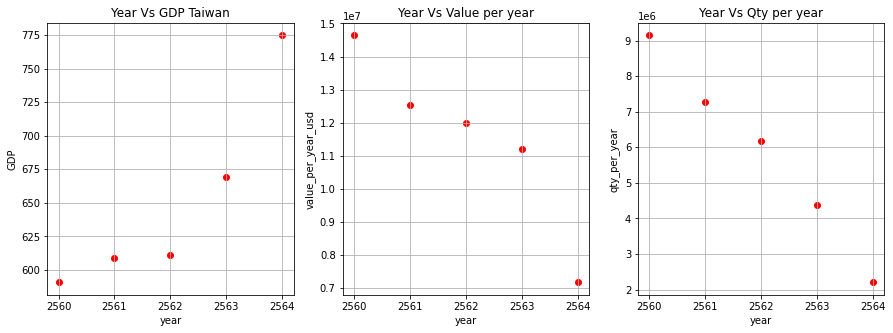

In [100]:
#@title
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(top_4['year'], top_4['GDP'], color='red')
plt.title('Year Vs GDP Taiwan')
plt.xlabel('year')
plt.ylabel('GDP')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(top_4['year'], top_4['value_per_year_usd'], color='red')
plt.title('Year Vs Value per year')
plt.xlabel('year')
plt.ylabel('value_per_year_usd')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(top_4['year'], top_4['qty_per_year'], color='red')
plt.title('Year Vs Qty per year')
plt.xlabel('year')
plt.ylabel('qty_per_year')
plt.grid(True)
plt.show()

In [101]:
#@title
model = LinearRegression()
X_gdp4 = top_4[['year']]
y_gdp4 = top_4.GDP

model.fit(X_gdp4.values, y_gdp4)
print('GDP Taiwan score :',model.score(X_gdp4.values, y_gdp4))

pred_gdp4 = model.predict(np.arange(2565, 2570, 1).reshape(-1, 1))
print('Predict GDP Taiwan:',pred_gdp4)

GDP Taiwan score : 0.8110959124980613
Predict GDP Taiwan: [779.477 822.282 865.087 907.892 950.697]


In [102]:
#@title
regr = LinearRegression()

# value per year Taiwan
X_val_4 = top_4[['GDP', 'qty_th']]
y_val_4 = top_4['value_per_year_usd'] 

val_top4 = regr.fit(X_val_4.values, y_val_4)

print('Intercept (value Taiwan) :', val_top4.intercept_)
print('Coefficients (value Taiwan) :', val_top4.coef_)
print('Model score (value Taiwan) :',regr.score(X_val_4.values, y_val_4))

pred_val_top4 = val_top4.predict([[pred_gdp4[0], pred_qty_th[0]],
                          [pred_gdp4[1], pred_qty_th[1]],
                          [pred_gdp4[2], pred_qty_th[2]],
                          [pred_gdp4[3], pred_qty_th[3]],
                          [pred_gdp4[4], pred_qty_th[4]]])
print('Predict value Taiwan :', pred_val_top4)
print('\n')

# qty per year Taiwan
X_qty_4 = top_4[['GDP', 'qty_th']]
y_qty_4 = top_4['qty_per_year']

qty_top4 = regr.fit(X_qty_4.values, y_qty_4)

print('Intercept (qty Taiwan) :', qty_top4.intercept_)
print('Coefficients (qty Taiwan) :', qty_top4.coef_)
print('Model score (qty Taiwan) :',regr.score(X_qty_4.values, y_qty_4))

pred_qty_top4 = qty_top4.predict([[pred_gdp4[0], pred_qty_th[0]],
                          [pred_gdp4[1], pred_qty_th[1]],
                          [pred_gdp4[2], pred_qty_th[2]],
                          [pred_gdp4[3], pred_qty_th[3]],
                          [pred_gdp4[4], pred_qty_th[4]]])

print('Predict qty Taiwan :', pred_qty_top4)

Intercept (value Taiwan) : 31099218.897821613
Coefficients (value Taiwan) : [-2.49983521e+04 -3.43261601e-03]
Model score (value Taiwan) : 0.9521614338718207
Predict value Taiwan : [6652482.66578589 5035559.95438098 3418637.24297644 1801714.53157154
  184791.820167  ]


Intercept (qty Taiwan) : 20694068.333793547
Coefficients (qty Taiwan) : [-1.23460288e+04 -7.05332330e-03]
Model score (qty Taiwan) : 0.9800706068109158
Predict qty Taiwan : [  876586.55645686  -775587.52472429 -2427761.60590525 -4079935.6870864
 -5732109.76826736]


In [103]:
pred_qty_top4.min()

-5732109.768267363

In [104]:
pred_qty_top4_nor = pred_qty_top4 + abs(pred_qty_top4.min())
print('Predict qty Taiwan :', pred_qty_top4)
print('Predict qty Taiwan normalize:', pred_qty_top4_nor)

Predict qty Taiwan : [  876586.55645686  -775587.52472429 -2427761.60590525 -4079935.6870864
 -5732109.76826736]
Predict qty Taiwan normalize: [6608696.32472422 4956522.24354308 3304348.16236211 1652174.08118096
       0.        ]


## Top 5 - UnitedStates

In [105]:
#@title
data1 = data.copy()
top5 = data1.groupby('country')
top_5 = top5.get_group('UnitedStates')
top_5

,year,country,qty_per_year,GDP,value_per_year_usd,qty_th
3,2560,UnitedStates,456539,19479.63,2408710,663066000
8,2561,UnitedStates,623612,20527.15,4481067,759829000
13,2562,UnitedStates,731148,21372.60,6189177,1018261000
18,2563,UnitedStates,589213,20893.75,5833969,1111928000
23,2564,UnitedStates,790851,22996.08,8186951,1283593000


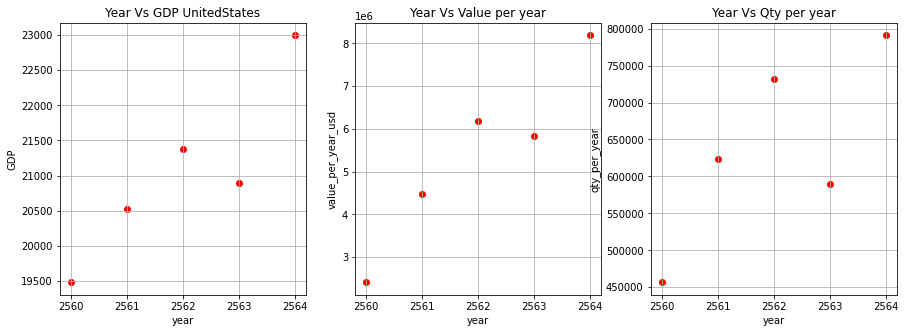

In [106]:
#@title
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(top_5['year'], top_5['GDP'], color='red')
plt.title('Year Vs GDP UnitedStates')
plt.xlabel('year')
plt.ylabel('GDP')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(top_5['year'], top_5['value_per_year_usd'], color='red')
plt.title('Year Vs Value per year')
plt.xlabel('year')
plt.ylabel('value_per_year_usd')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(top_5['year'], top_5['qty_per_year'], color='red')
plt.title('Year Vs Qty per year')
plt.xlabel('year')
plt.ylabel('qty_per_year')
plt.grid(True)
plt.show()

In [107]:
#@title
model = LinearRegression()
X_gdp5 = top_5[['year']]
y_gdp5 = top_5.GDP

model.fit(X_gdp5.values, y_gdp5)
print('GDP UnitedStates score :',model.score(X_gdp5.values, y_gdp5))

pred_gdp5 = model.predict(np.arange(2565, 2570, 1).reshape(-1, 1))
print('Predict GDP UnitedStates:', pred_gdp5)

GDP UnitedStates score : 0.8227198233377725
Predict GDP UnitedStates: [23273.692 24013.642 24753.592 25493.542 26233.492]


In [108]:
#@title
regr = LinearRegression()

# value per year UnitedStates
X_val_5 = top_5[['GDP', 'qty_th']]
y_val_5 = top_5['value_per_year_usd']

val_top5 = regr.fit(X_val_5.values, y_val_5)

print('Intercept (value UnitedStates) :', val_top5.intercept_)
print('Coefficients (value UnitedStates) :', val_top5.coef_)
print('Model score (value UnitedStates) :',regr.score(X_val_5.values, y_val_5))

pred_val_top5 = val_top5.predict([[pred_gdp5[0], pred_qty_th[0]],
                          [pred_gdp5[1], pred_qty_th[1]],
                          [pred_gdp5[2], pred_qty_th[2]],
                          [pred_gdp5[3], pred_qty_th[3]],
                          [pred_gdp5[4], pred_qty_th[4]]])
print('Predict value UnitedStates :', pred_val_top5)
print('\n')

# qty per year UnitedStates
X_qty_5 = top_5[['GDP', 'qty_th']]
y_qty_5 = top_5['qty_per_year']

qty_top5 = regr.fit(X_qty_5.values, y_qty_5)

print('Intercept (qty UnitedStates) :', qty_top5.intercept_)
print('Coefficients (qty UnitedStates) :', qty_top5.coef_)
print('Model score (qty UnitedStates) :',regr.score(X_qty_5.values, y_qty_5))

pred_qty_top5 = qty_top5.predict([[pred_gdp5[0], pred_qty_th[0]],
                          [pred_gdp5[1], pred_qty_th[1]],
                          [pred_gdp5[2], pred_qty_th[2]],
                          [pred_gdp5[3], pred_qty_th[3]],
                          [pred_gdp5[4], pred_qty_th[4]]])

print('Predict qty UnitedStates :', pred_qty_top5)

Intercept (value UnitedStates) : -19375093.71442804
Coefficients (value UnitedStates) : [1.02536452e+03 3.31550551e-03]
Model score (value UnitedStates) : 0.9785762615812869
Predict value UnitedStates : [ 9280762.50194686 10567691.73592917 11854620.96991172 13141550.20389403
 14428479.43787633]


Intercept (qty UnitedStates) : -1888151.017988638
Coefficients (qty UnitedStates) : [ 1.28826892e+02 -1.92154038e-04]
Model score (qty UnitedStates) : 0.9003836351995482
Predict qty UnitedStates : [ 832409.74078624  897122.12104832  961834.50131044 1026546.88157252
 1091259.2618346 ]


# Result

## Top 5 quantity 2565-2569

In [109]:
#@title
pred_qty_top = [pred_qty_top1, pred_qty_top2_nor, pred_qty_top3, pred_qty_top4_nor, pred_qty_top5]
data_qty = pd.DataFrame(pred_qty_top, columns = ['2565', '2566', '2567', '2568', '2569'])
cty = ['China', 'Vietnam', 'HongKong', 'Taiwan','UnitedState']

data_qty['2565'] = data_qty['2565'].map(int)
data_qty['2566'] = data_qty['2566'].map(int)
data_qty['2567'] = data_qty['2567'].map(int)
data_qty['2568'] = data_qty['2568'].map(int)
data_qty['2569'] = data_qty['2569'].map(int)
print('Top 5 quantity 2565-2569')
data_qty.insert(0, 'Country', cty, True)
data_qty

Top 5 quantity 2565-2569


,Country,2565,2566,2567,2568,2569
0,China,851841369,1006789589,1161737809,1316686029,1471634248
1,Vietnam,214871763,161153822,107435881,53717940,0
2,HongKong,60363349,53859511,47355674,40851836,34347999
3,Taiwan,6608696,4956522,3304348,1652174,0
4,UnitedState,832409,897122,961834,1026546,1091259


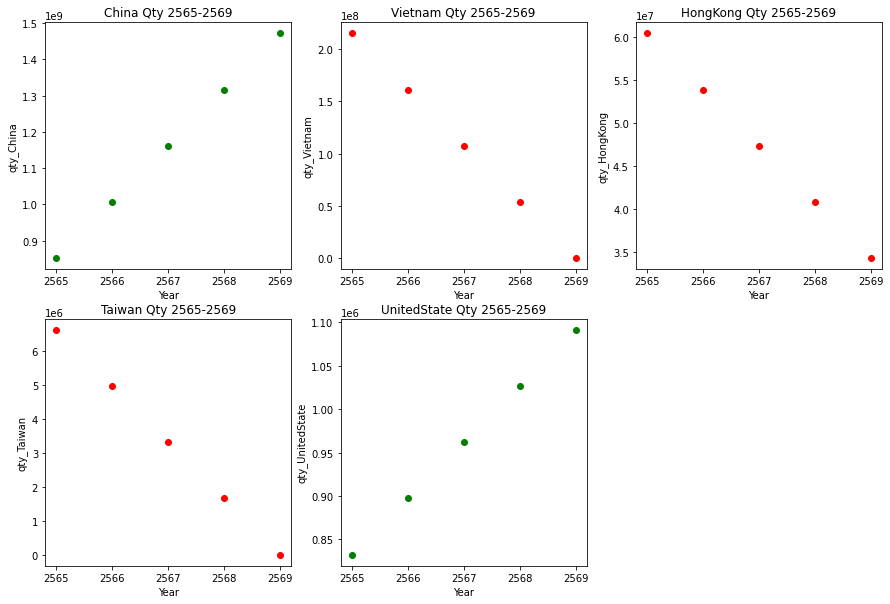

In [110]:
#@title quantity 2565-2569
data_qty_1 = data_qty.T
data_qty_1 = data_qty_1.drop(['Country'])
data_qty_1 = data_qty_1.reset_index()
data_qty_1 = data_qty_1.rename(columns={"index": "Year", 0: "qty_China", 1: "qty_Vietnam", 2: "qty_HongKong", 3: "qty_Taiwan", 4: "qty_UnitedState"})

plt.figure(figsize=(15, 10))
# China
plt.subplot(2,3,1)
plt.scatter(data_qty_1['Year'], data_qty_1['qty_China'], color='green')
plt.title('China Qty 2565-2569')
plt.xlabel('Year')
plt.ylabel('qty_China')

# Vietnam
plt.subplot(2,3,2)
plt.scatter(data_qty_1['Year'], data_qty_1['qty_Vietnam'], color='red')
plt.title('Vietnam Qty 2565-2569')
plt.xlabel('Year')
plt.ylabel('qty_Vietnam')

# Hongkong
plt.subplot(2,3,3)
plt.scatter(data_qty_1['Year'], data_qty_1['qty_HongKong'], color='red')
plt.title('HongKong Qty 2565-2569')
plt.xlabel('Year')
plt.ylabel('qty_HongKong')

# Taiwan
plt.subplot(2,3,4)
plt.scatter(data_qty_1['Year'], data_qty_1['qty_Taiwan'], color='red')
plt.title('Taiwan Qty 2565-2569')
plt.xlabel('Year')
plt.ylabel('qty_Taiwan')

# UnitedState
plt.subplot(2,3,5)
plt.scatter(data_qty_1['Year'], data_qty_1['qty_UnitedState'], color='green')
plt.title('UnitedState Qty 2565-2569')
plt.xlabel('Year')
plt.ylabel('qty_UnitedState')

plt.show()

## Top 5 value 2565-2569

In [111]:
#@title
pred_val_top = [pred_val_top1, pred_val_top2, pred_val_top3, pred_val_top4, pred_val_top5]
data_val = pd.DataFrame(pred_val_top, columns = ['2565', '2566', '2567', '2568', '2569'])
cty = ['China', 'Vietnam', 'HongKong', 'Taiwan','UnitedState']

data_val['2565'] = data_val['2565'].map(int)
data_val['2566'] = data_val['2566'].map(int)
data_val['2567'] = data_val['2567'].map(int)
data_val['2568'] = data_val['2568'].map(int)
data_val['2569'] = data_val['2569'].map(int)
print('Top 5 value 2565-2569')
data_val.insert(0, 'Country', cty, True)
data_val

Top 5 value 2565-2569


,Country,2565,2566,2567,2568,2569
0,China,3268889625,3953648024,4638406422,5323164821,6007923219
1,Vietnam,148948088,112128822,75309556,38490291,1671025
2,HongKong,269416843,292701303,315985764,339270224,362554684
3,Taiwan,6652482,5035559,3418637,1801714,184791
4,UnitedState,9280762,10567691,11854620,13141550,14428479


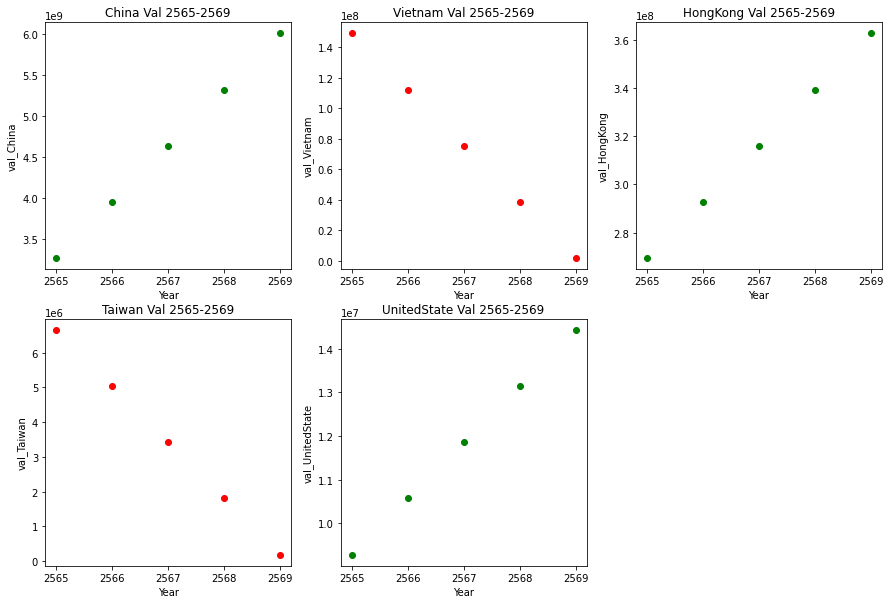

In [112]:
#@title value 2565-2569
data_val_1 = data_val.T
data_val_1 = data_val_1.drop(['Country'])
data_val_1 = data_val_1.reset_index()
data_val_1 = data_val_1.rename(columns={"index": "Year", 0: "val_China", 1: "val_Vietnam", 2: "val_HongKong", 3: "val_Taiwan", 4: "val_UnitedState"})
data_val_1

plt.figure(figsize=(15, 10))
# China
plt.subplot(2,3,1)
plt.scatter(data_val_1['Year'], data_val_1['val_China'], color='green')
plt.title('China Val 2565-2569')
plt.xlabel('Year')
plt.ylabel('val_China')

# Vietnam
plt.subplot(2,3,2)
plt.scatter(data_val_1['Year'], data_val_1['val_Vietnam'], color='red')
plt.title('Vietnam Val 2565-2569')
plt.xlabel('Year')
plt.ylabel('val_Vietnam')

# Hongkong
plt.subplot(2,3,3)
plt.scatter(data_val_1['Year'], data_val_1['val_HongKong'], color='green')
plt.title('HongKong Val 2565-2569')
plt.xlabel('Year')
plt.ylabel('val_HongKong')

# Taiwan
plt.subplot(2,3,4)
plt.scatter(data_val_1['Year'], data_val_1['val_Taiwan'], color='red')
plt.title('Taiwan Val 2565-2569')
plt.xlabel('Year')
plt.ylabel('val_Taiwan')

# UnitedState
plt.subplot(2,3,5)
plt.scatter(data_val_1['Year'], data_val_1['val_UnitedState'], color='green')
plt.title('UnitedState Val 2565-2569')
plt.xlabel('Year')
plt.ylabel('val_UnitedState')

plt.show()